<a href="https://colab.research.google.com/github/AlexGCas/analysis_of_stationarity_in_biosignals/blob/main/Copy_of_analisis_biosenales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

5.1 implementación de funciones

In [ ]:
def rms(vector):
  N = len(vector)
  magnitud = np.linalg.norm(vector)
  return magnitud/N

5.1 prueba

In [ ]:
# se sabe que el rms del seno es 0.707
t = np.arange(0, 1, 0.01)
T = 1
w = 2 * np.pi / T
seno = np.sin(w * t)
rms(seno)

0.07071067811865475

# extracción desde el .mat

In [ ]:
'''cambar ruta por la ruta propia del drive, si este archivo es compartido seguramente la ruta cambie de MyDrive a Shareddrives'''
ruta = '/content/drive/MyDrive/senales/practica3/signals.mat'
data = sio.loadmat(ruta)
# las llaves relevantes son Fs = 1024, y almacenamiento de senales en 
# 'ECG_asRecording', 'ECG_filtered', 'EMG_filtered1', 'EMG_filtered2', 'EMG_asRecording1', 'EMG_asRecording2' 

5.1 función para calcular el tiempo de duración de cualquier señal con la forma de estas señales

In [ ]:
def calcular_duracion(senal, Fs):
  '''
  tiempo de duracion = puntos*tiempo entre muestras
  tiempo entre muestras = 1/frecuencia de muestreo = 1/Fs'''
  Ts = 1/Fs
  duracion = senal.shape[1]*Ts
  return duracion

5.1 funcion para graficar senales filtradas y sin filtrar

In [ ]:
def plot_filtered_and_non_filtered(filtered, non_filtered, Fs=1024):
  duracion = calcular_duracion(filtered, Fs)
  Ts = 1/Fs
  tiempo = np.arange(0, duracion, Ts)
  filtered_reshape = filtered.reshape([filtered.shape[1]])
  non_filtered_reshape = non_filtered.reshape([filtered.shape[1]])
  plt.figure(figsize=[15, 7])
  plt.plot(tiempo, filtered_reshape, tiempo, non_filtered_reshape)
  plt.title('filtrada y no filtrada vs tiempo')
  plt.xlabel('tiempo')
  plt.ylabel('magnitud')
  plt.legend(['filtrada', 'sin filtrar'])

# 5.2 ecg

extracción

In [ ]:
ECG_asRecording = data['ECG_asRecording']
ECG_filtered = data['ECG_filtered']

tiempo de duración

In [ ]:
'''forma de la (senal 1, 30720)'''
Fs = 1024
tiempo_duracion_ecg_recording = calcular_duracion(ECG_asRecording, Fs)
print('el tiempo de duracion para la senal de ecg sin filtrar es:', tiempo_duracion_ecg_recording, 'segundos')

el tiempo de duracion para la senal de ecg sin filtrar es: 30.0 segundos


In [ ]:
tiempo_duracion_ecg_filtered = calcular_duracion(ECG_filtered, Fs)
print('el tiempo de duracion para la senal de ecg filtrada es:', tiempo_duracion_ecg_filtered, 'segundos')

el tiempo de duracion para la senal de ecg filtrado es: 30.0 segundos


Gráfica

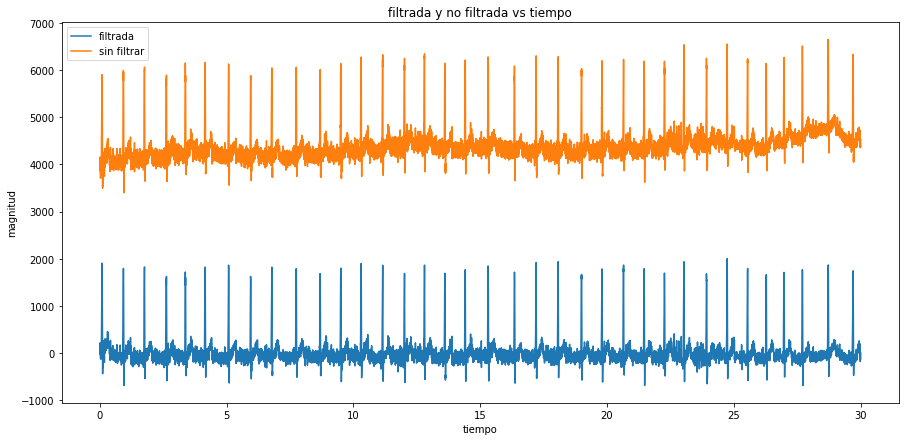

In [ ]:
plot_filtered_and_non_filtered(ECG_filtered, ECG_asRecording)
'''el filtro debe ser pasa altas pues la componente dc de la senal original es totalmente eliminada en la senal filtrada'''

5.2 ciclo cardiaco: 
1. hay 36 picos. 
2. el primer ciclo está tomado aproximadamente desde la mitad, al último le falta aproximadamente una cuarta parte para completarse.
3. por lo anterior, hay aproximadamente 35.25 ciclos 30720 puntos.
4. cada ciclo representa 30720/35.25 puntos = 872 puntos.
5. los primeros 436 puntos perteneceran al primer ciclo incompleto
6. el primer ciclo completo irá desde el punto 437 hasta el punto 437 + 872 = 1309

In [ ]:
def graficar_ciclo(senal, inicio, final, tipo=None, Fs=1024, graficar = True):
  Ts = 1/Fs
  ciclo = senal.reshape([senal.shape[1]])[inicio:final]
  tiempo_ciclo = Ts*np.arange(inicio, final)
  if graficar:
    plt.figure(figsize=(17, 7))
    plt.plot(tiempo_ciclo, ciclo)
    plt.title(f'ciclo de la senal {tipo}')
    plt.xlabel('tiempo')
    plt.ylabel('amplitud')
  return ciclo, tiempo_ciclo

In [ ]:
def operaciones(senal):
  return [np.mean(senal), rms(senal), np.var(senal), np.std(senal)]

In [ ]:
def print_operaciones(tipo, *args):
  print(f'promedio: {args[0]}, rms: {args[1]}, varianza: {args[2]}, desviacion estandar: {args[3]} para la senal {tipo}')

un ciclo sin filtrar

aaaaaaaaa


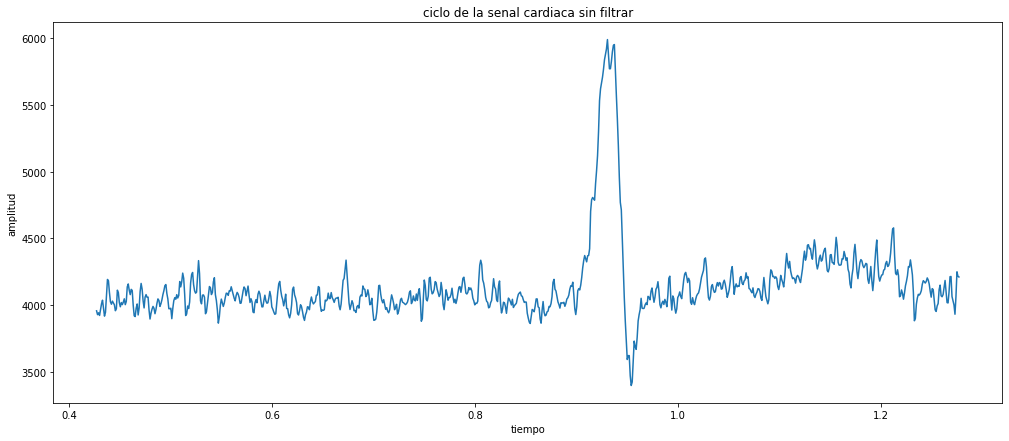

In [ ]:
primer_ciclo_completo, tiempo_un_ciclo = graficar_ciclo(ECG_asRecording, 437, 1309, 'cardiaca sin filtrar')

In [ ]:
resultados_cardiaca_no_filtrada = operaciones(primer_ciclo_completo)
print_operaciones('cardiaca sin filtrar', *resultados_cardiaca_no_filtrada)

promedio: 4144.980489188378, rms: 140.72745182617754, varianza: 88412.83245819306, desviacion estandar: 297.3429542770319 para la senal cardiaca sin filtrar


un ciclo filtrado

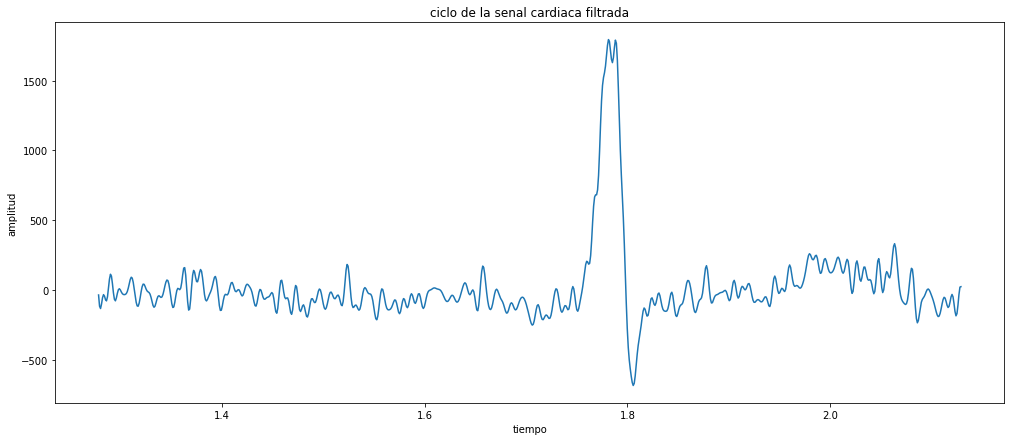

In [ ]:
primer_ciclo_completo_filtrado, tiempo_un_ciclo_filtrado = graficar_ciclo(ECG_filtered, 437, 1309, 'cardiaca filtrada')

In [ ]:
resultados_cardiaca_filtrada = operaciones(primer_ciclo_completo_filtrado)
print_operaciones('cardiaca sin filtrar', *resultados_cardiaca_filtrada)

promedio: 14.800196145455738, rms: 9.705977480325549, varianza: 81928.5851900236, desviacion estandar: 286.23169843681467 para la senal cardiaca sin filtrar


In [ ]:
contador = 437

def dataframe_ciclos(senal, num_ciclos, inicio, num_puntos, tipo, graficar = True):
  dataframe = pd.DataFrame(columns = ['promedio', 'rms', 'varianza', 'std'])
  for i in range(num_ciclos):
    ciclo, tiempo = graficar_ciclo(ECG_filtered, inicio, inicio + num_puntos, graficar = graficar)
    resultados = operaciones(ciclo)
    dataframe.loc[len(dataframe)] = resultados
    inicio+=num_puntos
  return dataframe

In [ ]:
dataframe = dataframe_ciclos(ECG_filtered, 15, 437, 872, 'cardiaca filtrada', graficar=False)

In [ ]:
dataframe

,promedio,rms,varianza,std
0,14.800196,9.705977,81928.585190,286.231698
1,-14.902373,9.762061,82877.636965,287.884763
2,-18.175789,9.204976,73555.578766,271.211318
3,8.053584,9.224215,74130.250949,272.268711
4,3.810493,9.742308,82749.233241,287.661665
5,-1.440980,9.956136,86434.606456,293.997630
6,-2.994258,9.030367,71100.478988,266.646731
7,9.450907,9.646160,81048.881283,284.690852
8,3.799267,9.674332,81598.393003,285.654324
9,-4.301687,9.137644,72790.472211,269.797095


In [ ]:
varianza = dataframe['varianza']
promedio = dataframe['promedio']
valor_rms = dataframe['rms']
std = dataframe['std']

In [ ]:
np.mean(std)

282.9579763920857

In [ ]:
''' el promedio se puede considerar aproximadamente constante si se tiene en cuenta que la desviación estandar es en promedio de 282 para la serie, caso similar
con el valor rms que mide la raiz de la potencia dc de la senal'''

' el promedio se puede considerar aproximadamente constante si se tiene en cuenta que la desviación estandar es en promedio de 282 para la serie, caso similar\ncon el valor rms que mide la raiz de la potencia dc de la senal'

Text(0, 0.5, 'var')

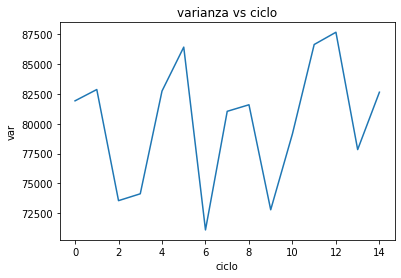

In [ ]:
'''la diferencia entre la varianza mínima y máxima es del 23%'''
((np.max(varianza) - np.min(varianza))/np.min(varianza))*100
plt.plot(varianza)
plt.title('varianza vs ciclo')
plt.xlabel('ciclo')
plt.ylabel('var')

Text(0, 0.5, 'std')

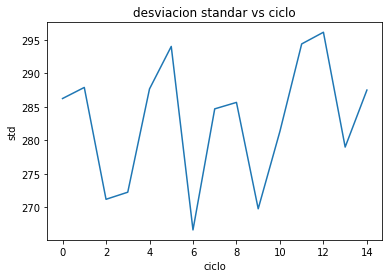

In [ ]:
'''la desviacion estandar tiene una diferencia entre su mínimo y su máximo del 11% '''
((np.max(std) - np.min(std))/np.min(std))*100
plt.plot(std)
plt.title('desviacion standar vs ciclo')
plt.xlabel('ciclo')
plt.ylabel('std')

# 5.3 primer emg

extracción

In [ ]:
EMG_asRecording1 = data['EMG_asRecording1']
EMG_filtered1 = data['EMG_filtered1']

tiempo de duración

In [ ]:
tiempo_duracion_emg1_recording = calcular_duracion(EMG_asRecording1, Fs)
print('el tiempo de duracion para la senal 1 de sin filtrado es:', tiempo_duracion_emg1_recording, 'segundos')

el tiempo de duracion para la senal 1 de sin filtrado es: 30.0009765625 segundos


In [ ]:
tiempo_duracion_emg1_filtered = calcular_duracion(EMG_filtered1, Fs)
print('el tiempo de duracion para la senal 1 de filtrada es:', tiempo_duracion_emg1_filtered, 'segundos')

el tiempo de duracion para la senal 1 de filtrada es: 30.0009765625 segundos


Gráfica

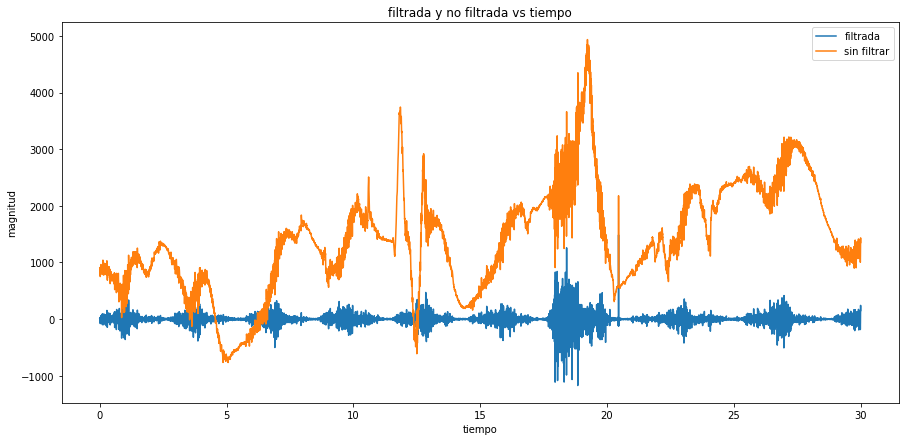

In [ ]:
plot_filtered_and_non_filtered(EMG_filtered1, EMG_asRecording1)
'''se perdieron oscilaciones lentas y nivel dc por lo que el filtro utilizado debe ser un filtro pasa altas'''

5.3: tramo de contraccion


1.   existen 10 senales de contracción guardadas en la senal completa
2.   la senal completa tiene 30721 puntos
3.   la primera contracción está guardada aproximadamente un 95%
4.   solo un 50% la última contracción está almacenado
5.   en total existen 8 + 1.4 = 9.45 contracciones en la senal
6.   cada contracción ocupa un total 30721/9.45 = 3088 puntos de la senal original
7.   la primera contracción completa comienza en el punto 3088*0.95 = 2933 y va hasta el punto 6021



In [ ]:
3088*0.95 + 3088

6021.6

sin filtrar

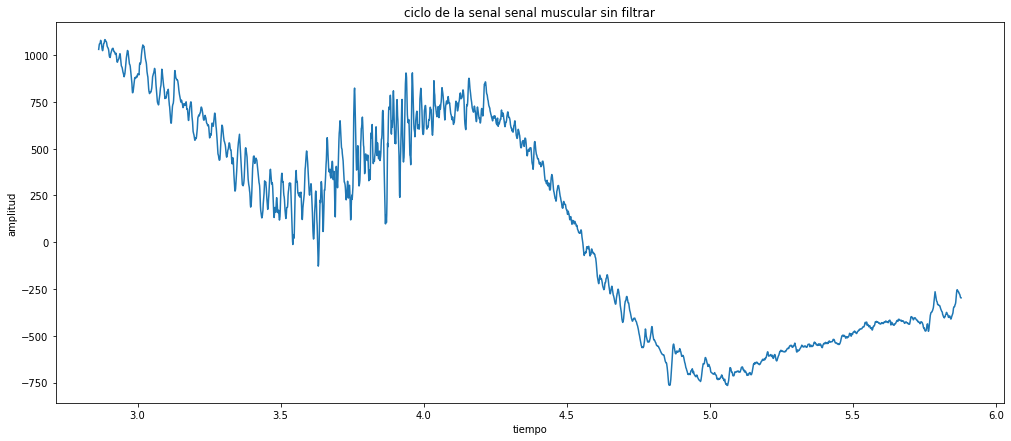

In [ ]:
ciclo_emg1_no_filtro, _= graficar_ciclo(EMG_asRecording1, 2933, 6021, tipo='senal muscular sin filtrar')

In [ ]:
resultados_emg1_no_filtro = operaciones(ciclo_emg1_no_filtro)
print_operaciones('muscular sin filtrar', *resultados_emg1_no_filtro)

promedio: 67.55751374674968, rms: 9.787604153315524, varianza: 308405.41860391013, desviacion estandar: 555.3426137114908 para la senal cardiaca sin filtrar


filtrada

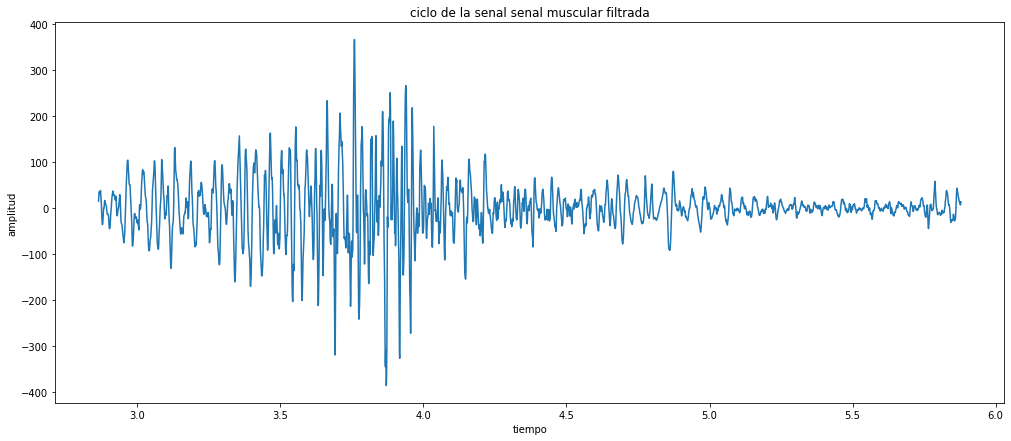

In [ ]:
ciclo_emg1_filtro, _= graficar_ciclo(EMG_filtered1, 2933, 6021, tipo='senal muscular filtrada')

In [ ]:
resultados_emg1_filtro = operaciones(ciclo_emg1_filtro)
print_operaciones('muscular filtrada', *resultados_emg1_filtro)

promedio: 0.06304620474260897, rms: 1.100919818448378, varianza: 3742.727516438708, desviacion estandar: 61.17783517286884 para la senal muscular filtrada


todos los tramos completos

In [ ]:
dataframe_emg1 = dataframe_ciclos(EMG_filtered1, 8, 2933, 3088, 'muscular filtrada', graficar = False)
dataframe_emg1

,promedio,rms,varianza,std
0,-6.896060,4.793390,70904.146237,266.278325
1,8.718060,5.228211,84331.979398,290.399689
2,-10.215280,4.917828,74579.038480,273.091630
3,8.238960,5.330209,87665.672259,296.083894
4,-3.512975,4.795372,70998.062296,266.454616
5,10.432381,5.379553,89256.605516,298.758440
6,-6.916509,5.338691,87965.153957,296.589201
7,7.885140,5.187026,83021.212472,288.134018


# 5.3 segundo emg

extracción

In [ ]:
EMG_asRecording2 = data['EMG_asRecording2']
EMG_filtered2 = data['EMG_filtered2']

tiempo de duración

In [ ]:
tiempo_duracion_emg2_recording = calcular_duracion(EMG_asRecording2, Fs)
print('el tiempo de duracion para la senal 2 de sin filtrado es:', tiempo_duracion_emg2_recording, 'segundos')

el tiempo de duracion para la senal 2 de sin filtrado es: 30.0009765625 segundos


In [ ]:
tiempo_duracion_emg2_filtered = calcular_duracion(EMG_filtered2, Fs)
print('el tiempo de duracion para la senal 2 de filtrada es:', tiempo_duracion_emg2_filtered, 'segundos')

el tiempo de duracion para la senal 2 de filtrada es: 30.0009765625 segundos


Gráfica

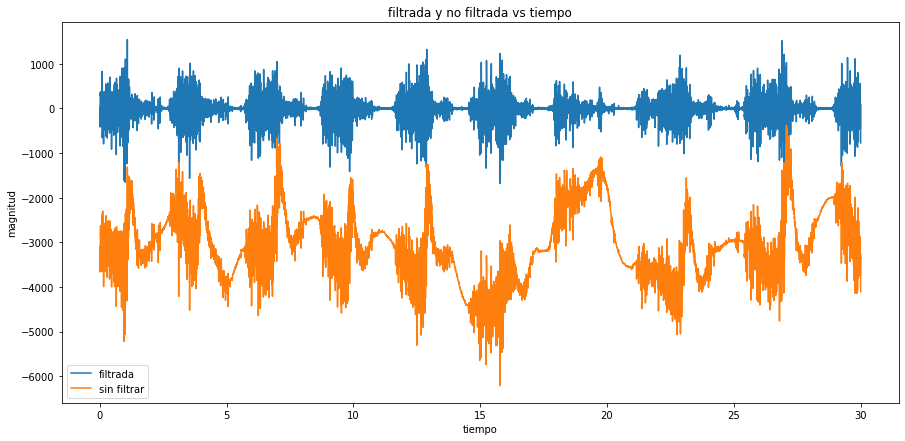

In [ ]:
plot_filtered_and_non_filtered(EMG_filtered2, EMG_asRecording2)
'''el filtro debe ser un filtro pasa altas pues eliminó las componentes oscilatirias lentas de la señal sin filtrar y además eliminó totalmente el nivel dc'''

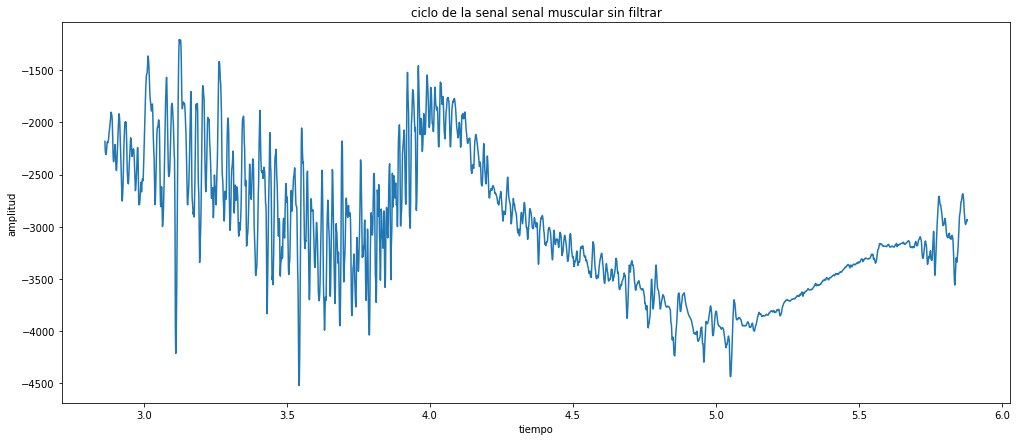

In [ ]:
ciclo_emg2_no_filtro, _= graficar_ciclo(EMG_asRecording2, 2933, 6021, tipo='senal muscular sin filtrar')

In [ ]:
resultados_emg1_no_filtro = operaciones(ciclo_emg1_no_filtro)
print_operaciones('muscular sin filtrar', *resultados_emg1_no_filtro)

promedio: 91.44554966201746, rms: 10.326724576666582, varianza: 320945.862056446, desviacion estandar: 566.5208399136311 para la senal muscular sin filtrar


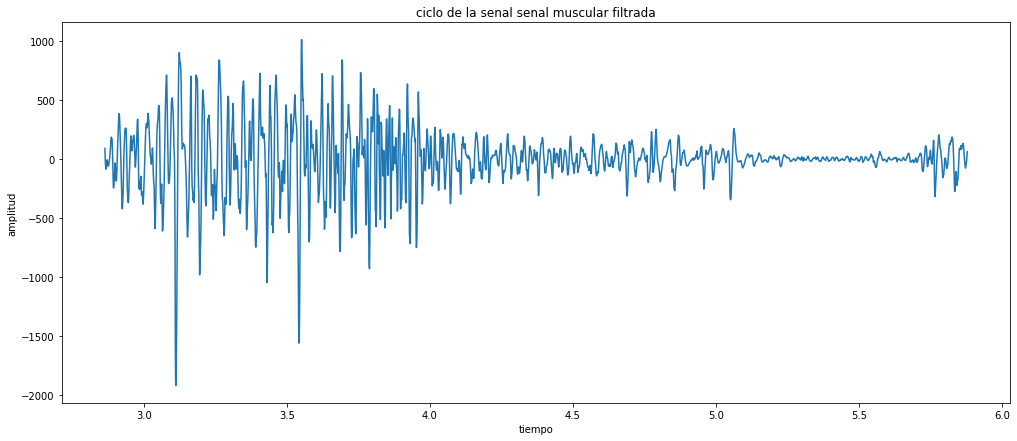

In [ ]:
ciclo_emg2_filtro, _= graficar_ciclo(EMG_filtered2, 2933, 6021, tipo='senal muscular filtrada')

In [ ]:
resultados_emg2_filtro = operaciones(ciclo_emg2_filtro)
print_operaciones('muscular filtrada', *resultados_emg2_filtro)

promedio: -0.04920633569883528, rms: 4.491685611320221, varianza: 62301.13755908265, desviacion estandar: 249.60195824368577 para la senal muscular filtrada


In [ ]:
dataframe_emg2 = dataframe_ciclos(EMG_filtered1, 8, 2933, 3088, 'muscular filtrada', graficar = False)
dataframe_emg2

,promedio,rms,varianza,std
0,-6.896060,4.793390,70904.146237,266.278325
1,8.718060,5.228211,84331.979398,290.399689
2,-10.215280,4.917828,74579.038480,273.091630
3,8.238960,5.330209,87665.672259,296.083894
4,-3.512975,4.795372,70998.062296,266.454616
5,10.432381,5.379553,89256.605516,298.758440
6,-6.916509,5.338691,87965.153957,296.589201
7,7.885140,5.187026,83021.212472,288.134018


In [ ]:
'''al comparar los filtros para las 3 senales, es muy posible que la presencia de ruido en las senales emg sea mayor a la presencia de ruido en la senal ecg porque
precisamente la senal de ecg sea la que esté causando el ruido en las senales emg, también se ve que las componentes de ruido de la senal ecg son menores si se
comparan con las senales de emg'''

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])